In [11]:
import sys, os
from labMTsimple.storyLab import *
import codecs ## handle utf8
import pathlib

from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np

out_dir = '../data/hedonometer/'

In [2]:
all_talks = pd.read_csv('../data/talks_6d.csv')
just_text = all_talks.loc[:,"text"]
just_dates = all_talks.loc[:,"numDate"]

dates_text = pd.concat([just_dates,just_text], axis = 1)
dt_sort = dates_text.sort_values("numDate", kind="mergesort")

num_talks = dt_sort.shape[0]

In [3]:
#last_date = dt_sort.loc[:,"numDate"].max()
curr_date = dt_sort.loc[:,"numDate"].min()
type(curr_date)

numpy.int64

In [4]:
# Initialize both CURR_DATE and MONTH_TEXT
curr_date = dt_sort.loc[:,"numDate"].min()
month_text = " "
year_list = []
date_list = [curr_date]

# loop over each talk and extract the date
for i in range(num_talks):
    curr_row = dt_sort[i:i+1]
    inds = curr_row.index.values.astype(int)[0]
    out_date = curr_row.loc[inds,"numDate"]
    
    # If the date is the same as the current date, then extract
    # and add the text to the monthly text
    if out_date <= curr_date:
        month_text = month_text + " " + curr_row.loc[inds,"text"]
    
    else:
        # If the date is the greater than the current date, then
        # save the last's monthly text.
        mfname = out_dir + "month" + str(curr_date) + ".txt"
        mf = open(mfname,'w')
        mf.write(month_text)
        mf.close()
        
        # Edit the year list, removing any texts that are more than
        # a year before the one that we are considering. 
        year_check = [curr_date-years for years in date_list]
        if 100 in year_check:
            cut_pt = year_check.index(100)
            year_list = year_list[cut_pt:]
        
        # Join one year of text into one string and then save that
        # text in a new file. 
        year_text = " ".join(year_list)
        
        mfyear = out_dir + "prevYear" + str(curr_date) + ".txt"
        mfy = open(mfyear,"w")
        mfy.write(year_text)
        mfy.close()
        
        # Add the last month's date and text to respective lists
        date_list.append(curr_date)
        year_list.append(month_text)
        
        # Once you have saved each part, then clear the monthly 
        # text. Next update the current date and start a new 
        # monthly text with this row's extracted text.
        curr_date = out_date
        month_text = " "
        month_text = curr_row.loc[inds,"text"]

In [6]:
# Get the list of the month and year files:
path_test = '../data/hedonometer/'
p = pathlib.Path(path_test)
monthlist = list(p.glob('**/month*'))
yearlist = list(p.glob('**/prev*'))

num_months = len(monthlist)

In [8]:
# Adapted from Hedonometer example: 
# https://labmt-simple.readthedocs.io/detailed-example.html
lang = 'english'
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang,returnVector=True)

val_list = []
for mnds in range(num_months):
    mfilename = str(monthlist[mnds])
    #yfile = str(yearlist[mnds])
    
    mf = codecs.open(mfilename,"r","utf8")
    Mtext = mf.read()
    mf.close

    # Compute valence score, returing the frequency vector
    mValence,mFvec = emotion(Mtext,labMT,shift=True,happsList=labMTvector)
    
    #We need to "stop the vectors first" and "apply a lens"
    mStoppedVec = stopper(mFvec,labMTvector,labMTwordList,stopVal=1.0)
    mValence = emotionV(mStoppedVec,labMTvector)
    
    val_list.append(mValence)
    #print('the valence of {0} is {1:.5}'.format('Gore2006',gValence))


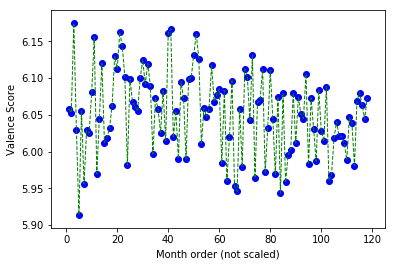

In [17]:
x = list(range(num_months))
x = [each+1 for each in x]

plt.plot(x, val_list, 'g--', lw=1)
plt.scatter(x,val_list, c="b", marker='o')
plt.xlabel("Month order (not scaled)")
plt.ylabel("Valence Score")
plt.show()


# Adapted from https://matplotlib.org/gallery/lines_bars_and_markers/
#      scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py
# Line from https://matplotlib.org/gallery/misc/zorder_demo.html#sphx-glr-gallery-misc-zorder-demo-py

In [27]:
#curr_row
#curr_row = dt_sort[0:15]
#out_text = curr_row.loc[0,"text"]
#filename = out_dir + "month" + str(curr_date) + ".txt"

In [ ]:
'''month_text = ""
for i in range(num_talks):
    curr_row = dt_sort[i:i-1]
    out_date = curr_row.loc[0,"numDate"]
    if out_date <= curr_date:
        month_text = month_text + " " + curr_row.loc[0,"text"]
    else:
        curr_date = out_date
        month_text = curr_row.loc[0,"text"]
'''